## Introduction 

In this notebook we are going to open a root file and take a look at some of the data that is stored. This is a file with real LHC data. 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import h5py
import yaml
import pickle 
import mplhep as hep
import awkward as ak
import sklearn.metrics as metrics

plt.rcParams['figure.dpi'] = 100

In [4]:
filename = "/uscms/home/jpearkes/eos/forAda/scouting_nano.root" # originally from root://hip-cms-se.csc.fi//store/user/pinkaew/scouting_nano_prod_golden/ScoutingPFRun3/crab_ScoutingPFRun3_Run2024D-v1_380385-380470_Golden/240517_205837/0000/scouting_nano_399.root

file = uproot.open(filename)

In [5]:
events = file["Events"]

In [6]:
events.keys()

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'orbitNumber',
 'nScoutingJet',
 'ScoutingJet_nConstituents',
 'ScoutingJet_nCh',
 'ScoutingJet_nElectrons',
 'ScoutingJet_nMuons',
 'ScoutingJet_nNh',
 'ScoutingJet_nPhotons',
 'ScoutingJet_area',
 'ScoutingJet_chEmEF',
 'ScoutingJet_chHEF',
 'ScoutingJet_eta',
 'ScoutingJet_mass',
 'ScoutingJet_muEF',
 'ScoutingJet_neEmEF',
 'ScoutingJet_neHEF',
 'ScoutingJet_phi',
 'ScoutingJet_pt',
 'ScoutingJet_particleNet_prob_b',
 'ScoutingJet_particleNet_prob_bb',
 'ScoutingJet_particleNet_prob_c',
 'ScoutingJet_particleNet_prob_cc',
 'ScoutingJet_particleNet_prob_g',
 'ScoutingJet_particleNet_prob_undef',
 'ScoutingJet_particlenet_prob_uds',
 'nScoutingFatJet',
 'ScoutingFatJet_nConstituents',
 'ScoutingFatJet_nCh',
 'ScoutingFatJet_nElectrons',
 'ScoutingFatJet_nMuons',
 'ScoutingFatJet_nNh',
 'ScoutingFatJet_nPhotons',
 'ScoutingFatJet_area',
 'ScoutingFatJet_chEmEF',
 'ScoutingFatJet_chHEF',
 'ScoutingFatJet_eta',
 'ScoutingFatJet_mas

In [14]:
# Print out stored L1 trigger names 
for branch in events.keys():
    if "L1_" in branch:
        print(branch)

L1_AlwaysTrue
L1_BPTX_AND_Ref1_VME
L1_BPTX_AND_Ref3_VME
L1_BPTX_AND_Ref4_VME
L1_BPTX_BeamGas_B1_VME
L1_BPTX_BeamGas_B2_VME
L1_BPTX_BeamGas_Ref1_VME
L1_BPTX_BeamGas_Ref2_VME
L1_BPTX_NotOR_VME
L1_BPTX_OR_Ref3_VME
L1_BPTX_OR_Ref4_VME
L1_BPTX_RefAND_VME
L1_BptxMinus
L1_BptxMinus_NotBptxPlus
L1_BptxOR
L1_BptxPlus
L1_BptxPlus_NotBptxMinus
L1_BptxXOR
L1_Centrality_0_0p5_BptxAND
L1_Centrality_0_1_BptxAND
L1_Centrality_30_100_MinimumBiasHF1_AND_BptxAND
L1_Centrality_30_40_BptxAND
L1_Centrality_30_50_BptxAND
L1_Centrality_40_50_BptxAND
L1_Centrality_50_100_MinimumBiasHF1_AND_BptxAND
L1_Centrality_50_65_BptxAND
L1_Centrality_65_80_BptxAND
L1_Centrality_80_100_BptxAND
L1_Centrality_Saturation_BptxAND
L1_DoubleEG10_BptxAND
L1_DoubleEG1_NotMinimumBiasHF2_AND_BptxAND
L1_DoubleEG2_BptxAND
L1_DoubleEG2_NotMinimumBiasHF2_AND_BptxAND
L1_DoubleEG3_NotMinimumBiasHF2_AND_BptxAND
L1_DoubleEG5_BptxAND
L1_DoubleEG5_NotMinimumBiasHF2_AND_BptxAND
L1_DoubleEG8_BptxAND
L1_DoubleEG_22_10_er2p5
L1_DoubleEG_25_12_er2

In [15]:
# Print out Scouting paths 
for branch in events.keys():
    if "DST_" in branch:
        print(branch)

DST_PFScouting_DoubleMuon
DST_PFScouting_DoubleEG
DST_PFScouting_JetHT
DST_PFScouting_DatasetMuon
DST_PFScouting_AXONominal
DST_PFScouting_AXOTight
DST_PFScouting_SingleMuon


In [17]:
# Print out HLT paths 
for branch in events.keys():
    if "HLT_" in branch:
        print(branch)

HLT_EphemeralPhysics
HLT_EphemeralZeroBias
HLT_EcalCalibration
HLT_HcalCalibration
HLT_HcalNZS
HLT_HcalPhiSym
HLT_Random
HLT_Physics
HLT_ZeroBias
HLT_ZeroBias_Alignment
HLT_ZeroBias_Beamspot
HLT_ZeroBias_IsolatedBunches
HLT_ZeroBias_FirstBXAfterTrain
HLT_ZeroBias_FirstCollisionAfterAbortGap
HLT_ZeroBias_FirstCollisionInTrain
HLT_ZeroBias_LastCollisionInTrain
HLT_HT300_Beamspot
HLT_IsoTrackHB
HLT_IsoTrackHE
HLT_PFJet40_GPUvsCPU
HLT_AK8PFJet380_SoftDropMass30
HLT_AK8PFJet400_SoftDropMass30
HLT_AK8PFJet425_SoftDropMass30
HLT_AK8PFJet450_SoftDropMass30
HLT_AK8DiPFJet250_250_SoftDropMass40
HLT_AK8DiPFJet250_250_SoftDropMass50
HLT_AK8DiPFJet260_260_SoftDropMass30
HLT_AK8DiPFJet260_260_SoftDropMass40
HLT_AK8DiPFJet270_270_SoftDropMass30
HLT_AK8DiPFJet280_280_SoftDropMass30
HLT_AK8DiPFJet290_290_SoftDropMass30
HLT_CaloJet500_NoJetID
HLT_CaloJet550_NoJetID
HLT_DoubleMu5_Upsilon_DoubleEle3_CaloIdL_TrackIdL
HLT_DoubleMu3_DoubleEle7p5_CaloIdL_TrackIdL_Upsilon
HLT_Trimuon5_3p5_2_Upsilon_Muon
HLT_Tr

In [23]:
# Check how many events are in file
total_number_of_events = len(events["event"].array())
total_number_of_events

431555

In [30]:
# Look at the JetHT trigger bits 
trigger_bits = events["DST_PFScouting_JetHT"].array()
trigger_bits

<Array [False, False, False, ..., False, True, False] type='431555 * bool'>

In [33]:
# Calculating the number of events passing an individual trigger
total_passing_trigger = np.sum(trigger_bits)

In [36]:
# Calculate the fraction of events passing the JetHT trigger
total_passing_trigger/total_number_of_events*100.0

39.076826823927426

We can investigate different Scouting and HLT paths here: https://cmshltinfo.app.cern.ch/
- Click on "Path summary" 
- Double click on the path you are interested in 
- Click on "Filters" 
- Select a run in 2024 
- Double click on "hltL1s" 
- On the right: L1SeedsLogicalExpression will show you which level 1 trigger seeds are used for a particular scouting / HLT path 

E.g. https://cmshltinfo.app.cern.ch/path/DST_PFScouting_AXONominal_v 


# Questions
- What are the names of the L1 trigger bits used in the JetHT scouting trigger? 
- Do we store those particular L1 trigger bits for each in our file? 
- Out of the L1 trigger bits used in the JetHT scouting trigger what fraction of all events pass them?  
- Out of the L1 trigger bits used in the JetHT scouting trigger what fraction of the JetHT triggered events pass them?  
- Which is highest, which is lowest? 


In [38]:
# Plotiign events passing certain triggers

In [41]:
# Ploting events passing certain triggers
jet_pt = events['L1Jet_pt'].array() # all jet pts 
jet_pt
# jet_pt[trigger_bits]


<Array [[23, 22, 18, 16, ..., 19, 18, 11], ...] type='431555 * var * float32'>

In [42]:
# Mask out events not passing our JetHT trigger
jet_pt[trigger_bits]

<Array [[34, 12, 25.5, 104, 96, 24], ..., [...]] type='168638 * var * float32'>

In [54]:
# ~ negation 
jet_pt[~trigger_bits]

<Array [[23, 22, 18, 16, ..., 19, 18, 11], ...] type='262917 * var * float32'>

In [57]:
# Selecting the first jet 
jet_pt[~trigger_bits][:,0:1]

<Array [[23], [16], [20], ..., [28], [21.5]] type='262917 * var * float32'>

Text(0, 0.5, 'Events')

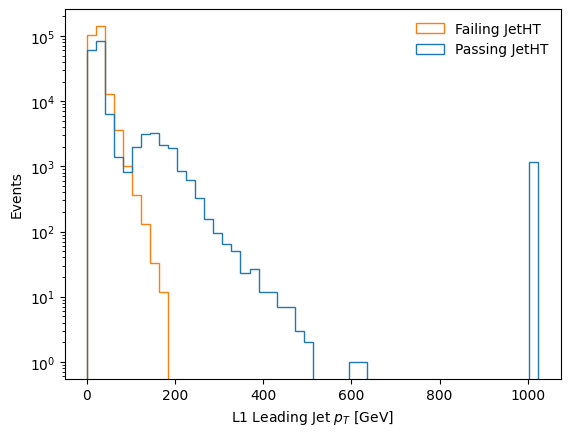

In [77]:
plt.hist([ak.flatten(jet_pt[trigger_bits][:,0:1]),
         ak.flatten(jet_pt[~trigger_bits][:,0:1])],
         bins=50,
         label=["Passing JetHT","Failing JetHT"],
        histtype='step')
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel(r"L1 Leading Jet $p_T$ [GeV]")
plt.ylabel("Events")

# Questions

- Can you make the same plot, but for each of the different L1 trigger bits that are part of the JetHT trigger? 